# Data Preprocessing: Dimensionality Reduction

In [1]:
%matplotlib inline
from sklearn import datasets
from pylab import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from __future__ import print_function
from sklearn.decomposition import KernelPCA, PCA
from sklearn.manifold import LocallyLinearEmbedding, Isomap
from kemlglearn.feature_selection.unsupervised import LaplacianScore


iris = datasets.load_iris()
col = ['r', 'g', 'b']
lc = [col[i] for i in iris['target']]

## Dimensionality Reduction - Linear: PCA

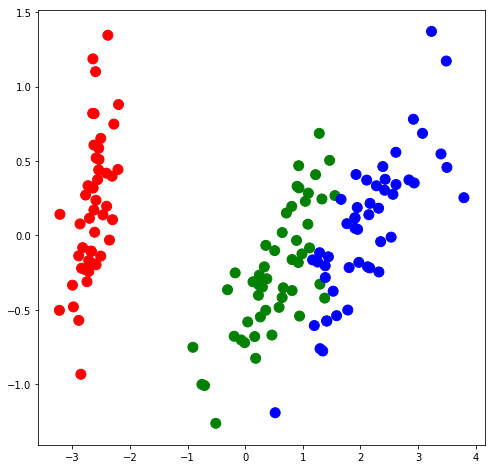

In [2]:
pca = PCA()
pdata = pca.fit_transform(iris['data'])

i=0 
j=1

fig = plt.figure(figsize=(8,8))
plt.scatter(pdata[:, i], pdata[:, j], c=lc,s=100);

Looking at the variance explained by each component, we can see that the first one has most of the variance and the two first components explains almost 98%, so only this components would be necessary. 

In [3]:
print(pca.explained_variance_ratio_)

[0.92461621 0.05301557 0.01718514 0.00518309]


## Dimensionality Reduction - non Linear: Kernel PCA

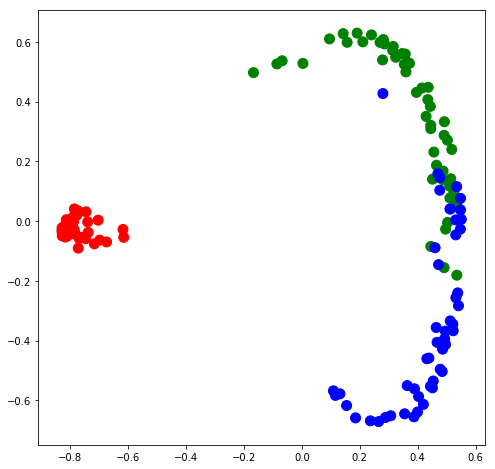

In [4]:
kernel='rbf' # 'rbf', 'poly'
degree=2

kpca = KernelPCA(n_components=2, kernel=kernel, degree=degree)
kpdata = kpca.fit_transform(iris['data'])
fig = plt.figure(figsize=(8,8))
plt.scatter(kpdata[:, 0], kpdata[:, 1], c=lc,s=100);

## Dimensionality Reduction - non Linear: ISOMAP

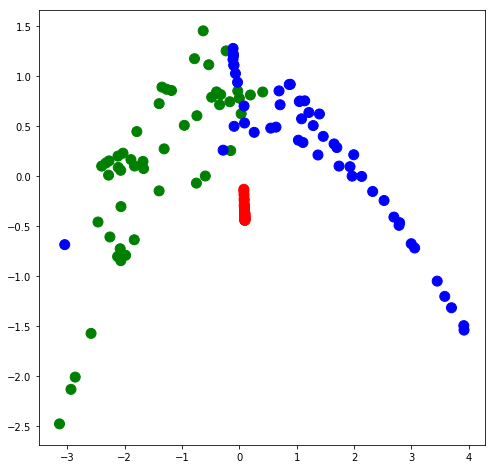

In [5]:
nn=3
      
iso = Isomap(n_components=2, n_neighbors=nn)
isdata = iso.fit_transform(iris['data'])
fig = plt.figure(figsize=(8,8))
plt.scatter(isdata[:, 0], isdata[:, 1], c=lc,s=100);

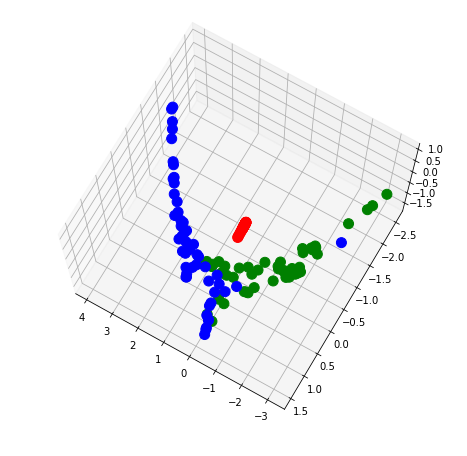

In [6]:
nn=3

iso = Isomap(n_components=3, n_neighbors=nn)
is3data = iso.fit_transform(iris['data'])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(75, 120)
plt.scatter(is3data[:, 0], is3data[:, 1], zs=is3data[:, 2], depthshade=False, c=lc,s=100);

## Dimensionality Reduction - non Linear: LLE

6.641420251883949e-08


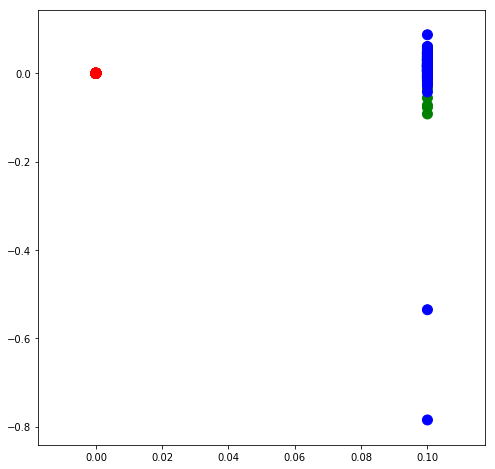

In [7]:
nn=5

lle = LocallyLinearEmbedding(n_neighbors=nn, n_components=2, method='standard')
lldata = lle.fit_transform(iris['data'])
print (lle.reconstruction_error_)
fig = plt.figure(figsize=(8,8))
plt.scatter(lldata[:, 0], lldata[:, 1], c=lc,s=100);

3.8706051124087444e-07


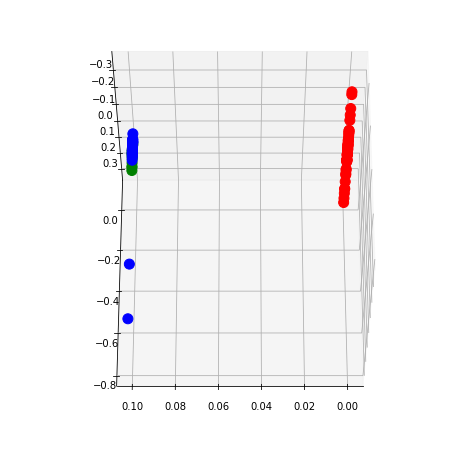

In [8]:
nn=5

lle = LocallyLinearEmbedding(n_neighbors=nn, n_components=3, method='standard')
ll3data = lle.fit_transform(iris['data'])
print (lle.reconstruction_error_)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(240, 90)
plt.scatter(ll3data[:, 0], ll3data[:, 1], zs=ll3data[:, 2], depthshade=False, c=lc,s=100);

## Feature Selection: Laplacian Score

[0.13554031 0.39609294 0.05806831 0.05145454]


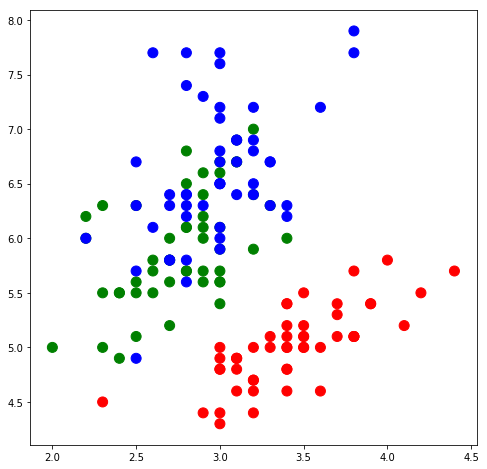

In [9]:
nn=5

lap = LaplacianScore(n_neighbors=nn, bandwidth=0.1, k=2)
irissel = lap.fit_transform(iris['data'])
print (lap.scores_)
fig = plt.figure(figsize=(8,8))
plt.scatter(irissel[:, 0], irissel[:, 1], c=lc,s=100);